# Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: poisonous=p, edible=e


Target variable

In this dataset our target variable is class

# import modules¶

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\batha\\Downloads\\mushroom.csv")
df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [3]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [4]:
df.shape

(8124, 23)

In [5]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

stalk-root column has 2480 missing values(Nan) so we can remove this

In [6]:
new_df=df.drop('stalk-root',axis=1)
new_df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [7]:
new_df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat', 'class'],
      dtype='object')

In [8]:
new_df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

The data is categorial so I convert it with LabelEncoder to transfer to ordinal.

In [9]:
labelencoder=LabelEncoder()
for column in new_df.columns:
    new_df[column] = labelencoder.fit_transform(new_df[column])

In [10]:
new_df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


In [11]:
new_df.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616,0.482029
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


From the table above it can be seen that the column "veil-type" is 0 and not contributing to the data so I remove it.

In [12]:
new_df=new_df.drop(["veil-type"],axis=1)

In [13]:
new_df

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,2,1,0,7,4,2,1


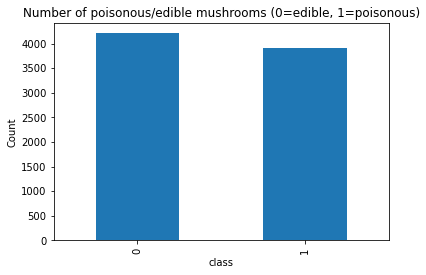

In [14]:
plt.figure()
pd.Series(new_df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

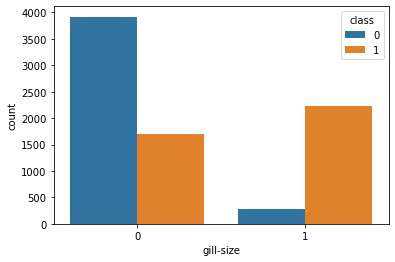

In [36]:
sns.countplot(x='gill-size',hue='class',data=new_df)

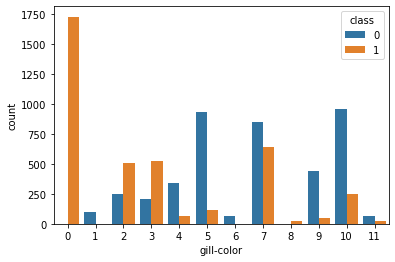

In [37]:
sns.countplot(x='gill-color',hue='class',data=new_df)

# Correlation Matrix

In [16]:
new_df.corr()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises%3F,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


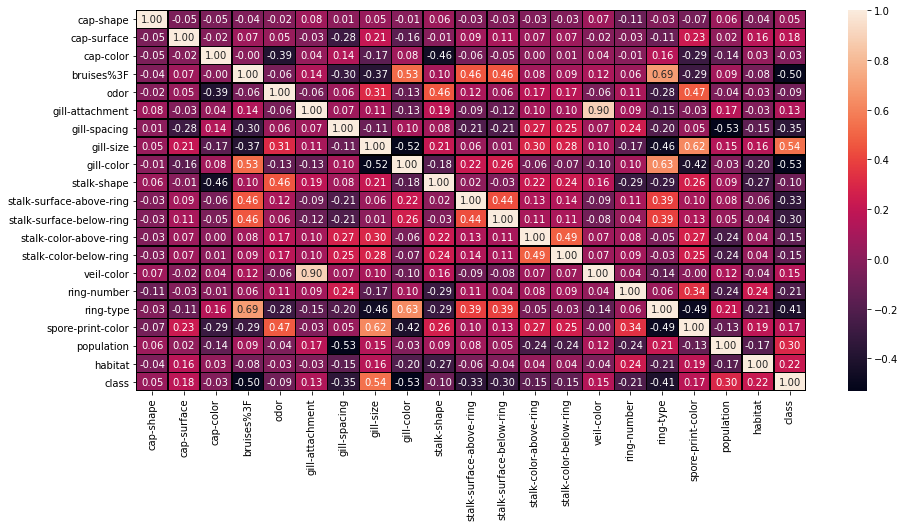

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7)) 
sns.heatmap(new_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

correlation:

from the above result it is clear that some columns making positive correlation while some columns making negative correlation

columns making highly positive corelation with the target variable

1.gill-size =0.54

2.population=0.30

columns making highly negative corelation with the target variable

1.gill-color=-0.53

2.bruises%3F=-0.50

3.ring type=-0.41

above positively or negatively correlated columns has a great impact on the target column

 let's look at gill color and gill size closely:

In [18]:
new_df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


Lets look closely at the feature "gill-color" :

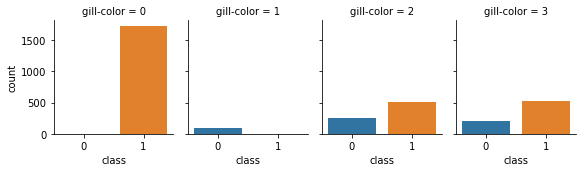

In [19]:
new_var=new_df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

above obervation shows that most of poisonous musrooms fall under the gill color value <=3.5

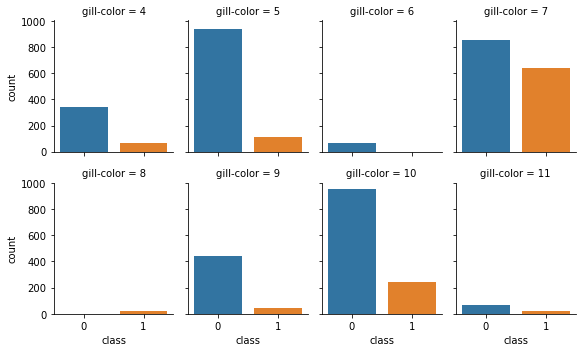

In [20]:
new_var=new_df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]

sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

>3.5above obervation shows that most of edible musrooms fall under the gill color value above 3.5

Lets look closely at the feature "gill-size" :

In [22]:
new_df[['class', 'gill-size']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


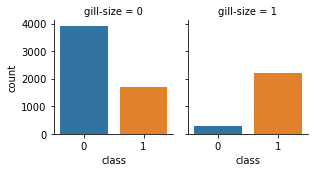

In [24]:
new_var=new_df[['class', 'gill-size']]
new_var=new_var[new_var['gill-size']<=1]
sns.factorplot('class', col='gill-size', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

above observation shows that most of edible musroom fall under the gill-size vale 0 

# Describe Heatmap

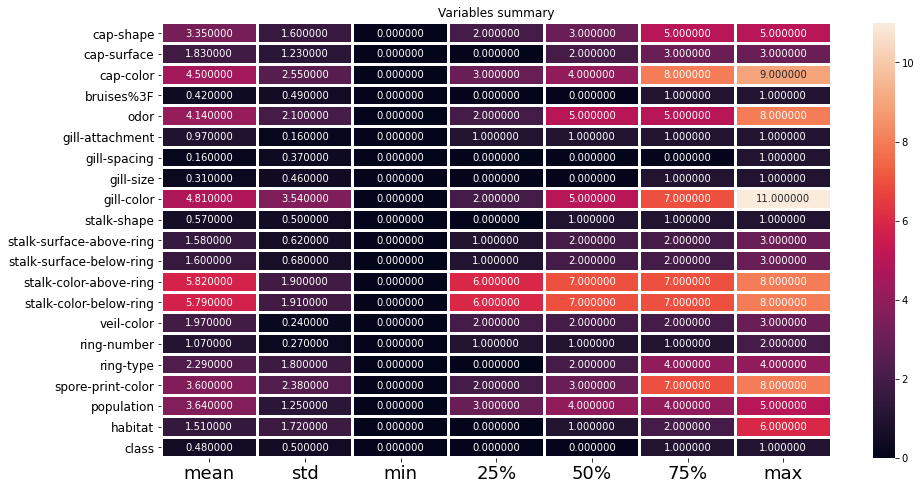

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(round(new_df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# model training

In [28]:
x=new_df.drop(columns=['class'],axis=1)
y=df['class']

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    
    model.fit(x_train, y_train)
    print("Accuracy:",model.score(x_test,y_test)*100)
    
    score=cross_val_score(model, x, y, cv=5)
    print("CV score:",np.mean(score)*100)

LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model,x,y)

Accuracy: 94.8301329394387
CV score: 84.92050018946571


DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 100.0
CV score: 90.83889352027283


RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracy: 100.0
CV score: 89.16450170519136


ExtraTreesClassifier

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,x,y)

Accuracy: 100.0
CV score: 91.20881394467601


DecisionTreeClassifier, ExtraTreesClassifier and RandomForestClassifier are high accuracy model so we can save one of them

# Serialization


In [34]:
import joblib
joblib.dump(ExtraTreesClassifier(),"musrooms.pkl")

['musrooms.pkl']